# Severity Prediction Model - Data Approach To Risk Control

## Table of Content 
#### [1.0 Introduction](#1)
#### [2.0 Data Acquisition & Cleaning](#2)
#### [3.0 Exploratory Analysis](#3)
#### [4.0 Predictive Model](#4)
#### [5.0 Decision Tree Model Conclusion](#5)
#### [6.0 Future Development](#6)


<a id="1"></a>
# 1.0 Introduction

## 1.1 Background
#### In the last 5 years Seattle have seen increase in fatal accidents and accidents with Serius Injury. The Charts below show traffic accidents since 2014 and 2015 have increased in the number of fatalities and serius injury despite improvement that the city have from 2010. This means in the last 5 years the road is not as safe as before. If not interviene, the community will carry more and more burden from the medical cost and from loss of income to families due to disabilities and death. Insurance company may also be forced to adjust the automobile liability premium up for customer living or commuting in Seattle in which it is a lose-lose situation for both Insurance Industry and community as a whole.

###### Chart Below taken from the Seattle city GIS Collision Data

<ipython-input-1-58a8306237ed>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col_sum["Year"] = df_col_sum["INCDATE"].astype("datetime64[ns]").dt.year
<ipython-input-1-58a8306237ed>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col_sum["Accidents"] = 1
C:\Users\adity\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

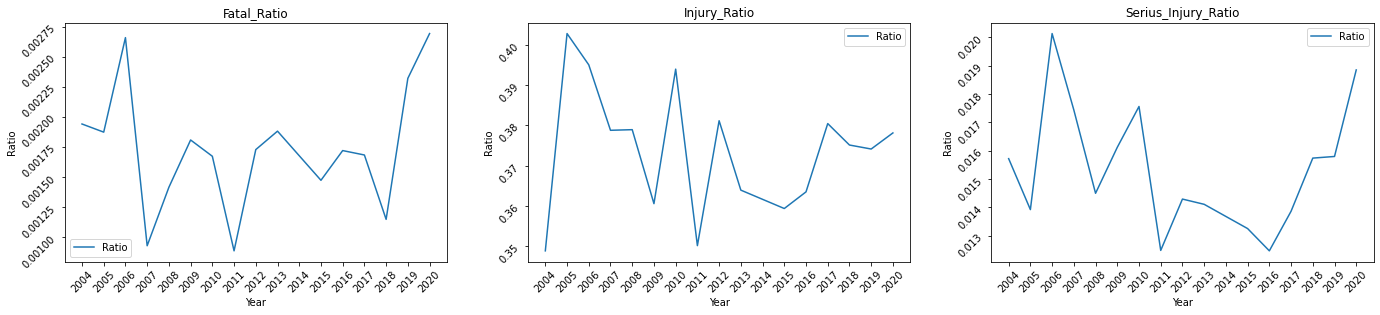

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df_col = pd.read_csv('C:/Project Data/Collisions.csv')

df_col_sum = df_col[["INCDATE","INJURIES","SERIOUSINJURIES","FATALITIES"]]
df_col_sum["Year"] = df_col_sum["INCDATE"].astype("datetime64[ns]").dt.year
df_col_sum["Accidents"] = 1
df_col_sum.drop(columns=["INCDATE"], inplace=True)
df_col_sum1 = df_col_sum.groupby(["Year"]).sum()
df_col_sum1["Injury Ratio"] = df_col_sum1["INJURIES"]/df_col_sum1["Accidents"]
df_col_sum1["Serious Injury Ratio"] = df_col_sum1["SERIOUSINJURIES"]/df_col_sum1["Accidents"]
df_col_sum1["Fatality Ratio"] = df_col_sum1["FATALITIES"]/df_col_sum1["Accidents"]
df_col_sum1.reset_index(inplace=True)
df_col_sum1.drop([0,11],inplace=True)
df_col_sum1.set_index(["Year"], inplace=True)

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
fig.tight_layout(pad=5.0)
ax1.plot(df_col_sum1["Fatality Ratio"], label='Ratio')
ax1.set_xlabel('Year') 
ax1.set_ylabel('Ratio')
ax1.set_title("Fatal_Ratio")
ax1.legend()
ax1.tick_params(labelrotation=45)
ax1.xaxis.set_major_locator(plt.MaxNLocator(20))
ax2.plot(df_col_sum1["Injury Ratio"], label='Ratio')
ax2.set_xlabel('Year') 
ax2.set_ylabel('Ratio')
ax2.set_title("Injury_Ratio")
ax2.legend()
ax2.tick_params(labelrotation=45)
ax2.xaxis.set_major_locator(plt.MaxNLocator(20))
ax3.plot(df_col_sum1["Serious Injury Ratio"], label='Ratio')
ax3.set_xlabel('Year') 
ax3.set_ylabel('Ratio')
ax3.set_title("Serius_Injury_Ratio")
ax3.legend()
ax3.tick_params(labelrotation=45)
ax3.xaxis.set_major_locator(plt.MaxNLocator(20))

## 1.2 Problem
#### To build a model that can provide indication whether a collision accident in certain road, weather, or driver condition will involve bodily injury or worse death. Data used to build the model should include i.e. the weather condition during the accident, light condition, how the collision happened and so on.  
#### The model can then be used by city goverment to develop regulation or to build infrastructure to prevent serious injuries or fatalities.

## 1.3 Interest
#### in General the community as a whole will benefit from the exercise however, City Goverment can get more tangible benefit since the model could help to build better regulation, build more collision prenvention infrastructure in area where it needs the most, or to plan and manage better traffic management and emergency service.

<a id="2"></a>
# 2.0 Data Acquisition & Cleaning

### 2.1 Data Source
#### For this exercise, we will use Collision record from Seattle city GIS. The Documentation for the Data can be found [here](https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf) and the link to the Data Source Is [here](https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0/data?geometry=-122.326%2C47.592%2C-122.318%2C47.594)
#### The Data contains all collision accidents since 2003 and it clearly describe what kind of collision, severity of the collision, what was the weather, road condition during the accident, how many vehicles involves, how many person involvoes, degree of injury, etc.. However not all feature of the data are usefull for to provide indication to an accident.

#### The next Section, the Preliminary Data Cleaning, we will focus on identifying feature that can be used to build model.

### 2.2 Preliminary Data Cleansing
#### Upon Examination we have found out that the Seatle GIS Data is unique that all rows indicate single collision accident without duplicates.

In [2]:
print('Original Data Shape :', df_col.shape)
df_col1 = df_col.drop_duplicates()
print('Unique Data Shape :',df_col1.shape)

Original Data Shape : (221389, 40)
Unique Data Shape : (221389, 40)


#### However features that only have one level will be omitted since they won't contribute to the model. They are:

In [3]:
df_col_desc = pd.DataFrame(df_col.nunique(),columns=['Level'])
df_col_desc.sort_values(by=['Level']).head(4)

,Level
INATTENTIONIND,1
SPEEDING,1
PEDROWNOTGRNT,1
EXCEPTRSNDESC,1


#### Upon further Examination we found out there are 3 features below that only have 2 levels however, one of them which 'EXCEPTRSNCODE' will be ommitted due to Not Enough Information. 

In [4]:
df_col_desc = pd.DataFrame(df_col.nunique(),columns=['Level'])
df_col_desc.sort_values(by=['Level']).iloc[4:7, 0:1]

,Level
EXCEPTRSNCODE,2
STATUS,2
HITPARKEDCAR,2


In [5]:
df_col_EXCEPTRSNCODE = pd.DataFrame(df_col.groupby(['EXCEPTRSNCODE'])['EXCEPTRSNCODE'].value_counts())
df_col_EXCEPTRSNCODE.head()

,,EXCEPTRSNCODE
EXCEPTRSNCODE,EXCEPTRSNCODE,
,,89207
NEI,NEI,11779


#### Other features below such as 'REPORTNO', 'INCKEY','OBJECTID', 'COLDETKEY','SDOTCOLNUM' are ommited because they are the Unique record identifier which don't carry information on how/ when/ what collision.

In [6]:
df_col_desc = pd.DataFrame(df_col.nunique(),columns=['Level'])
df_col_desc.sort_values(by=['Level']).iloc[34:40, 0:1]

,Level
SDOTCOLNUM,127186
INCDTTM,169519
REPORTNO,221386
INCKEY,221389
OBJECTID,221389
COLDETKEY,221389


#### Features below are not included because they represent the magnitude of the incident and not the probability of the severe accident (accident where poeple died). 
- PERSONCOUNT (The total number of people involved in the collision).
- PEDCOUNT (The number of pedestrians involved in the collision).
- PEDCYLCOUNT (The number of bicycles involved in the collision).
- VEHCOUNT (The number of vehicles involved in the collision).
- INJURIES (The number of total injuries in the collision). 
- SERIOUSINJURIES (The number of serious injuries in the collision).
- FATALITIES (The number of fatalities in the collision)

#### Features below also not inlcuded since they act as description to an existing codes:
- SEVERITYDESC description of SEVERITYCODE 
- SDOT_COLDESC description of SDOT_COLCODE
- ST_COLDESC description of ST_COLCODE	

#### and Features below  are not inlcuded since they act as pointer to the collision location but not the feature of the location:
- X
- Y
- INTKEY
- LOCATION
- SEGLANEKEY
- CROSSWALKKEY

### 2.3 Feature Selection

#### After understanding the meaning of each feature, 10 features will be used as independent variables to SEVERITYCODE. They Are: 
- ADDRTYPE : 
 - simple classification of the accident location 'Alley','Block','Intersection'.
- COLLISIONTYPE :
 - Describe how the collision happen such as collision at an angle, involving, cyclist, head on collision, etc.   
- JUNCTIONTYPE :
 - Describe the nature of the junction such as at intersection but not related to intersection, at mid-block but intersection related, at ramp junction, etc. 
- SDOT_COLCODE :
 - This is set of code define by Seattle's Department of Transportation that clearly define the nature of the collision. for example, it has specific code for collission where a motor vehicle hit a cyclist head on, or whether a motor vehicle rear-ended another vehicle. this feature will be intrumental in deterimining bodily injury in a collision.
- ST_COLCODE :
 - Similar to SDOT_COLCODE,this collision code prescribed by State Goverment.
- UNDERINFL :
 - This is boolean feature that describe whether the driver is under influence (alcohol or any other substence) while driving.
- ROADCOND :
 - This feature describe the road condition during the accident whether it was wet, has show on it, dry, has sand or dirt etc.
- WEATHER :
 - Describe the weather during the accident, whether it was raining, has smoke or smog, overcast, etc.
- LIGHTCOND :
 - Describe the light condition during the accident, whether it was Dark with street light, completely dark, day light, etc.
- HITPARKEDCAR :
 - This is boolean feature that describe whether the accident involves hitting a parked car.
- INCDTTM :
 - this the incident date information, for the model we would like to see how weekdays or weekend affects the severity of the collision.

#### As for the target label we will use
- SEVERITYCODE but transformed to simplify the non Bodily injury code where all non bodily injury and death are mapped to '0'.

<a id="3"></a>
# 3.0 Exploratory Analysis

### 3.1 Correlation Review
#### The selected features will be reviewed to see whether there are feature that have very little correlation with difference in Severity or features that may be highly correlated with Each other that they may be redudant

#### for the correlation review, instead of the original feature, we will work with the numerical version of each feature as shown below.

In [35]:
# Re-mapping categorical features
df_col['ADDRTYPE_1'] = df_col['ADDRTYPE'].fillna('Block').replace(['Alley','Block','Intersection'],['0','1','2']).astype('float64')
df_col['COLLISIONTYPE_1'] = df_col['COLLISIONTYPE'].fillna('Other').replace(['Angles','Cycles','Head On','Left Turn','Other','Parked Car','Pedestrian','Rear Ended','Right Turn','Sideswipe'],['0','1','2','3','4','5','6','7','8','9']).astype('float64')
df_col['JUNCTIONTYPE_1'] = df_col['JUNCTIONTYPE'].fillna('Unknown').replace(['At Intersection (but not related to intersection)','At Intersection (intersection related)','Driveway Junction','Mid-Block (but intersection related)','Mid-Block (not related to intersection)','Ramp Junction','Unknown'],['0','1','2','3','4','5','6']).astype('float64')
df_col['SDOT_COLCODE_1'] = df_col['SDOT_COLCODE'].fillna('0.0').astype('float64')
df_col['ST_COLCODE_1'] = df_col['ST_COLCODE'].replace(r'\s+', np.nan, regex=True).fillna('0.0')
df_col['ST_COLCODE_1_1'] = df_col['ST_COLCODE_1'].astype('float64')
df_col['UNDERINFL_1'] = df_col['UNDERINFL'].fillna('0').replace(['N','Y'],['0','1']).astype('float64')
df_col['ROADCOND_1'] = df_col['ROADCOND'].fillna('Unknown').replace(['Dry','Ice','Oil','Other','Sand/Mud/Dirt','Snow/Slush','Standing Water','Unknown','Wet'],['0','1','2','3','4','5','6','7','8']).astype('float64')
df_col['LIGHTCOND_1'] = df_col['LIGHTCOND'].fillna('Unknown').replace(['Dark - No Street Lights','Dark - Street Lights Off','Dark - Street Lights On','Dark - Unknown Lighting','Dawn','Daylight','Dusk','Other','Unknown'],['0','1','2','3','4','5','6','7','7']).astype('float64')
df_col['HITPARKEDCAR_1'] = df_col['HITPARKEDCAR'].fillna('N').replace(['N','Y'],['0','1']).astype('float64')
df_col['WEATHER_1'] = df_col['WEATHER'].fillna('Unknown').replace(['Blowing Sand/Dirt','Blowing Snow','Clear','Fog/Smog/Smoke','Other','Overcast','Partly Cloudy','Raining','Severe Crosswind','Sleet/Hail/Freezing Rain','Snowing','Unknown'],['0','1','2','3','4','5','6','7','8','9','10','4']).astype('float64')
df_col['INCDTTM_1'] = df_col['INCDTTM'].astype("datetime64[ns]").dt.dayofweek.apply(lambda x: 1 if (x>3)  else 0)

In [36]:
# Re-mapping target labels
df_col['SEVERITYCODE_1']=df_col['SEVERITYCODE'].fillna('0').replace(['0','1','2','2b','3'],['0','0','1','2','3']).astype('float64')
df_col['SEVERITYDESC_1']=df_col['SEVERITYDESC'].fillna('Unknown').replace(['Unknown','Property Damage Only Collision','Injury Collision','Serious Injury Collision','Fatality Collision'],['Other','Other','Other','Serious Injury','Fatal'])

#### To evaluate the features correlation with the target label as well as intercorrelation between features, Pearson Correlation exercise and heat map chart are used. 

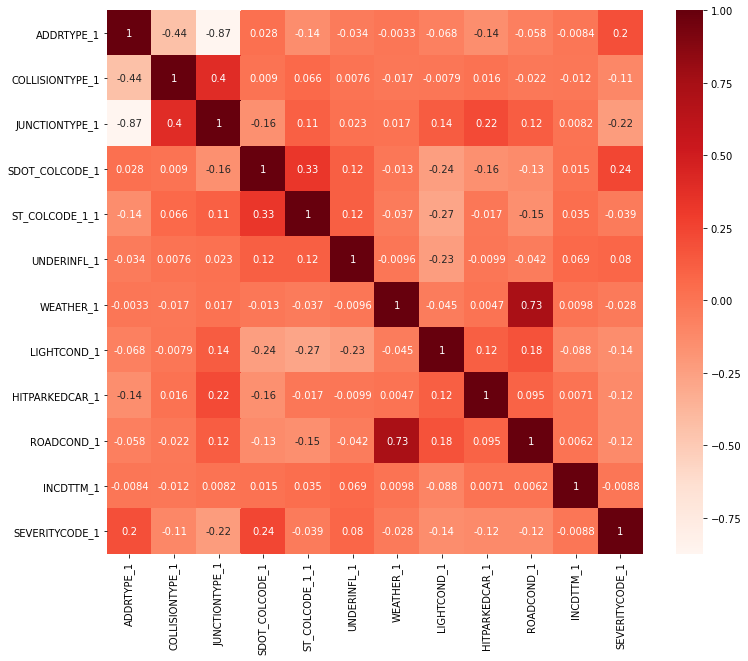

In [37]:
#Pearson Correlation
df_col_test = df_col[['ADDRTYPE_1','COLLISIONTYPE_1','JUNCTIONTYPE_1','SDOT_COLCODE_1','ST_COLCODE_1_1','UNDERINFL_1','WEATHER_1','LIGHTCOND_1','HITPARKEDCAR_1','ROADCOND_1','INCDTTM_1','SEVERITYCODE_1']]
plt.figure(figsize=(12,10))
cor = (df_col_test.corr(method='pearson'))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### The analysis indicates:
- Relatively Low correlation between 'SEVERITYCODE' and the features, the highest correlation score is 24% which is quite low. also,
- Heat map examination that there are 2 groups of features that are more intercorrelated
 - Address Type, Collision Type & Junction Type
 - Weather, Light Condiontion & Road Condition
- Incident Date (day of the week) feature is proven to be very uninstrumental with less then 1% correlation. thus Incident Date feature will be droped from the exercise

#### Further more, we found out that the label coding is not fully alligned yet, for example, for   Address type, the max value refer to Intersection but in Junction type,  the max value does not refer to intersection type junction. the label will be remmaped to allow more consistent correlation.

In [38]:
# Re-mapping categorical features

df_col['JUNCTIONTYPE_1'] = df_col['JUNCTIONTYPE'].fillna('Unknown').replace(['At Intersection (but not related to intersection)','At Intersection (intersection related)','Driveway Junction','Mid-Block (but intersection related)','Mid-Block (not related to intersection)','Ramp Junction','Unknown'],['5','6','2','4','3','1','0']).astype('float64')

#### The Correlation analysis to be re-run using the re-labeled JUNCTIONTYPE_1 and with these features removed:
- ADDRTYPE_1 due to high intercorrelation with JUNCTIONTYPE_1
- ROADCOND_1 due to high intercorrelation with WEATHER_1
- INCDTTM_1 (week days vs. week end) due to insignificant correlation with SEVERITYCODE_1
- ST_COLCODE_1_1 due to low correlation


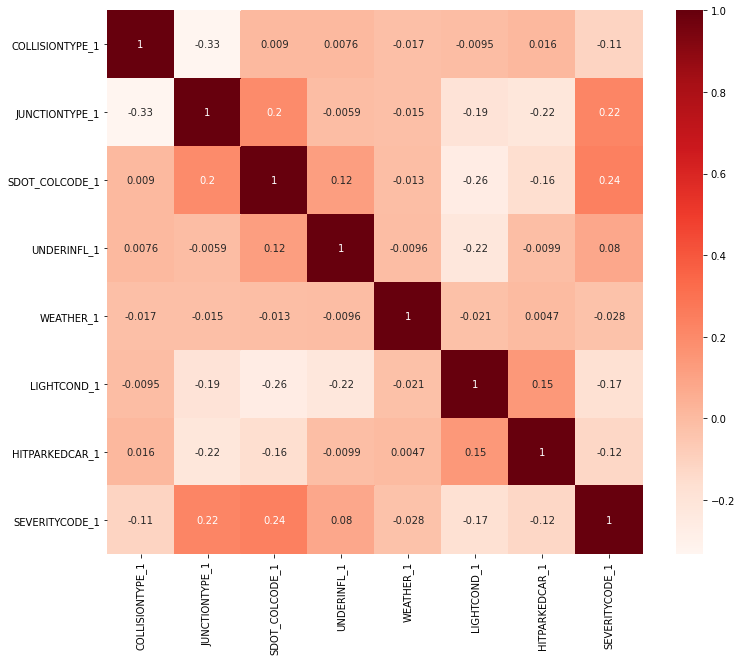

,SEVERITYCODE_1
SEVERITYCODE_1,1.000000
SDOT_COLCODE_1,0.243995
JUNCTIONTYPE_1,0.221725
LIGHTCOND_1,0.167100
HITPARKEDCAR_1,0.122408
COLLISIONTYPE_1,0.111033
UNDERINFL_1,0.080007
WEATHER_1,0.027716


In [11]:
df_col_test = df_col[['COLLISIONTYPE_1','JUNCTIONTYPE_1','SDOT_COLCODE_1','UNDERINFL_1','WEATHER_1','LIGHTCOND_1','HITPARKEDCAR_1','SEVERITYCODE_1']]
plt.figure(figsize=(12,10))
cor = (df_col_test.corr(method='pearson'))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

cor_target = pd.DataFrame(abs(cor['SEVERITYCODE_1']))
cor_target.sort_values(by=['SEVERITYCODE_1'],ascending=False)

#### The correlation exercise resulted in leaner set of predictive variables of X that will be used to build the model. 

<a id="4"></a>
# 4.0 Predictive Model

#### The Model to predict factors that influence the increase in collision involving bodily injury must satisfy 3 requirements; measurability & ease in understanding and abilty to produce actionable insight.
#### The outcome of the analysis is not only to produce a predictor of future colision but also to provide insight for City Goverment to do corrective action.
####  For the reasons above, the model used will be Decission Tree Model. 

### 4.1 Model Training

### Define Features
#### To Fit both Decission Tree, the Features will be on-hot-encoded and sorted by the incident date to allow splitting between Data used for model training/testing and Data used to validate the result 

In [40]:
#one-hot-encodings
feature = df_col[['SDOT_COLCODE_1','JUNCTIONTYPE_1','LIGHTCOND_1','HITPARKEDCAR_1','COLLISIONTYPE_1','UNDERINFL_1','WEATHER_1']]
feature = pd.concat([feature,pd.get_dummies(df_col['SDOT_COLCODE_1'],prefix='SDOT_COLCODE_X').astype('float64')], axis=1)
feature = pd.concat([feature,pd.get_dummies(df_col['JUNCTIONTYPE_1'],prefix='JUNCTIONTYPE_X').astype('float64')], axis=1)
feature = pd.concat([feature,pd.get_dummies(df_col['LIGHTCOND_1'],prefix='LIGHTCOND_X').astype('float64')], axis=1)
#feature = pd.concat([feature,pd.get_dummies(df_col['HITPARKEDCAR_1'],prefix='HITPARKEDCAR_X').astype('float64')], axis=1)
feature = pd.concat([feature,pd.get_dummies(df_col['COLLISIONTYPE_1'],prefix='COLLISIONTYPE_X').astype('float64')], axis=1)
#feature = pd.concat([feature,pd.get_dummies(df_col['UNDERINFL_1'],prefix='UNDERINFL_X').astype('float64')], axis=1)
feature = pd.concat([feature,pd.get_dummies(df_col['WEATHER_1'],prefix='WEATHER_X').astype('float64')], axis=1)
feature = pd.concat([feature,df_col["INCDATE"].astype("datetime64[ns]").dt.year], axis=1) ## year label to split between sample Data and non sample testing Data
feature.set_index(["INCDATE"], inplace=True)
feature.sort_index(inplace=True)
feature.drop(['SDOT_COLCODE_1','JUNCTIONTYPE_1','LIGHTCOND_1','COLLISIONTYPE_1','WEATHER_1'], axis=1, inplace=True)
feature.describe()

,HITPARKEDCAR_1,UNDERINFL_1,SDOT_COLCODE_X_0.0,SDOT_COLCODE_X_11.0,SDOT_COLCODE_X_12.0,SDOT_COLCODE_X_13.0,SDOT_COLCODE_X_14.0,SDOT_COLCODE_X_15.0,SDOT_COLCODE_X_16.0,SDOT_COLCODE_X_18.0,...,WEATHER_X_1.0,WEATHER_X_2.0,WEATHER_X_3.0,WEATHER_X_4.0,WEATHER_X_5.0,WEATHER_X_6.0,WEATHER_X_7.0,WEATHER_X_8.0,WEATHER_X_9.0,WEATHER_X_10.0
count,221389.000000,221389.000000,221389.000000,221389.000000,221389.000000,221389.000000,221389.000000,221389.000000,221389.00000,221389.000000,...,221389.000000,221389.000000,221389.000000,221389.000000,221389.000000,221389.000000,221389.000000,221389.000000,221389.000000,221389.000000
mean,0.054190,0.043494,0.086531,0.415662,0.008045,0.031099,0.267633,0.008212,0.04937,0.015502,...,0.000005,0.518065,0.002606,0.191568,0.128927,0.000045,0.153738,0.000117,0.000524,0.004151
std,0.226392,0.203966,0.281147,0.492837,0.089331,0.173586,0.442726,0.090246,0.21664,0.123539,...,0.002125,0.499675,0.050985,0.393536,0.335120,0.006721,0.360699,0.010836,0.022884,0.064295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Define label
#### Simillar with the Features the label SEVERITYCODE_1 will be sorted by incident date to allow splitting between target label used for model training/testing and target label used to validate the result 

In [41]:
label = pd.concat([df_col['SEVERITYCODE_1'],df_col["INCDATE"].astype("datetime64[ns]").dt.year], axis=1)
label.set_index(["INCDATE"], inplace=True)
label.sort_index(inplace=True)
label.head()

,SEVERITYCODE_1
INCDATE,
2003,0.0
2004,0.0
2004,1.0
2004,1.0
2004,1.0


### Define Model Data & Out Sample testing Data
#### The Model Data will Range from 2004 to 2019. The 2013 Data will be omitted since it ony have 1 record. The 2020 Data will be used to validate the result

In [42]:
# Model Data
MData = feature.loc['2004':'2019']
MData.shape

(216932, 78)

In [43]:
# Out Sample Data
OData = feature.loc['2020']
OData.shape

(4456, 78)

In [44]:
# Model Label
y = label.loc['2004':'2019']
y = y['SEVERITYCODE_1'].values
y.shape

(216932,)

In [45]:
# Out Sample Label
Oy = label.loc['2020']
Oy = Oy['SEVERITYCODE_1'].values
Oy.shape

(4456,)

### Define Train Data & Test Data
#### Due to the size of the Data, the model can afford to be built using 70% of the model data. 

In [48]:
from sklearn import preprocessing
#X= preprocessing.StandardScaler().fit(MData).transform(MData.astype(float))
X=MData.to_numpy()
XP = OData.to_numpy()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (151852, 78) (151852,)
Test set: (65080, 78) (65080,)


### Decision Tree Model
#### Tuning Decision Tree Model. Selecting the most optimal Max_Depth.

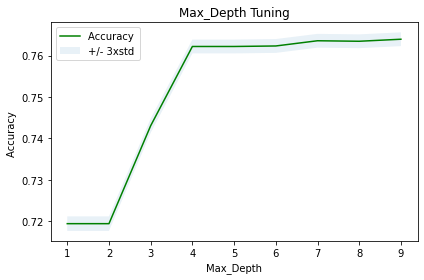

In [49]:
#Decision Tree Depth Tuning
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
steps = 10
mean_acc = np.zeros((steps-1))
std_acc = np.zeros((steps-1))
Matrix = [];
for n in range(1,steps):


    dt1_fx = DecisionTreeClassifier(criterion="entropy", max_depth=n).fit(X_train,y_train)
    yhat = dt1_fx.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
                                    
plt.plot(range(1,steps),mean_acc,'g')
plt.fill_between(range(1,steps),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Max_Depth')
plt.title('Max_Depth Tuning')
plt.tight_layout()
plt.show()

#### The Chart explain that after Max Depth of 4 there are no significant gain in accuracy. thus Max Depth 4 is the most optimal Max Depth.

#### Tuning Decision Tree Minimum Sample Leaf. the Iterration uses (Maximum iteration - n) approach.

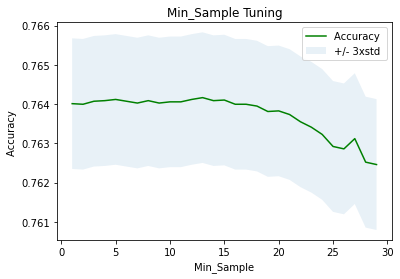

<Figure size 28800x28800 with 0 Axes>

In [50]:
#Decision Tree min Sample in Leaf Tuning
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
steps = 30
mean_acc = np.zeros((steps-1))
std_acc = np.zeros((steps-1))
Matrix = [];
for n in range(1,steps):


    dt1_fx = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=((steps)-((n-1)))).fit(X_train,y_train)
    yhat = dt1_fx.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
                                    
plt.plot(range(1,steps),mean_acc,'g')
plt.fill_between(range(1,steps),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Min_Sample')
plt.title('Min_Sample Tuning')
plt.figure(figsize=(400, 400))
plt.tight_layout()
plt.show()

#### The Chart Explain that after the 20th iteration, the Accuracy decrease significantly. therefore the most optimal Minimum sample in a leaf is (30-20) = 10.

## 4.2 Tuned Decision Tree Model
#### Based on the finding below the Decision Tree will be configured using Max Depth of 4 and minimum sample in leafs of 10.
#### In the same Process, the Model Performance is evaluated using Accuracy Score, Precision, Recall & F1 Score. The True & False prediction metrics also present to illustrate the Data Volume.

In [51]:
dtf_fx = DecisionTreeClassifier(criterion="entropy", max_depth=4,min_samples_leaf=10)
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

dtf_fx.fit(X_train,y_train)
yhat = dtf_fx.predict(X_test)
A = np.around(metrics.accuracy_score(y_test, yhat),decimals=4)
P = np.around(precision_score(y_test, yhat, average='weighted',zero_division=1),decimals=4)
R = np.around(recall_score(y_test, yhat, average='weighted',zero_division=1),decimals=4)
F1 = np.around(f1_score(y_test, yhat, average='weighted',zero_division=1),decimals=4)
mcm = multilabel_confusion_matrix(y_test, yhat,labels=[0,1,2,3])
TN = np.around(mcm[:, 0, 0].sum(),decimals=0)
TP = np.around(mcm[:, 1, 1].sum(),decimals=0)
FN = np.around(mcm[:, 1, 0].sum(),decimals=0)
FP = np.around(mcm[:, 0, 1].sum(),decimals=0)

#Precission = (mcm[:, 1, 1].sum()+mcm[:, 0, 0].sum())/mcm.sum()
#Recall = 
cfm_summ_DT_S = pd.DataFrame([A,P,R,F1,TN,TP,FN,FP],index=['Accuracy','Precission','Recall','F1 Score','Sum_True_Negative','Sum_True_Positive','Sum_False_Negative','Sum_False_Positve'],columns=['Sample Decision Tree'])

cfm_summ_DT_S

,Sample Decision Tree
Accuracy,0.7622
Precission,0.7733
Recall,0.7622
F1 Score,0.6983
Sum_True_Negative,179765.0000
Sum_True_Positive,49605.0000
Sum_False_Negative,15475.0000
Sum_False_Positve,15475.0000


#### The Tuned Decision Tree on Sample Data gives 0.76 accuracy which currently the most optimal fitting. With both Precission and Recall as well as F1 Score hover around 70%, the model is optimal in term of having minimum false prediction.

#### Predicting 2020 Out sample Data into the Tuned Decision Tree Model

In [54]:
yhat = dtf_fx.predict(XP)
A = np.around(metrics.accuracy_score(Oy, yhat),decimals=4)
P = np.around(precision_score(Oy, yhat, average='weighted',zero_division=1),decimals=4)
R = np.around(recall_score(Oy, yhat, average='weighted',zero_division=1),decimals=4)
F1 = np.around(f1_score(Oy, yhat, average='weighted',zero_division=1),decimals=4)
mcm = multilabel_confusion_matrix(Oy, yhat,labels=[0,1,2,3])
TN = np.around(mcm[:, 0, 0].sum(),decimals=0)
TP = np.around(mcm[:, 1, 1].sum(),decimals=0)
FN = np.around(mcm[:, 1, 0].sum(),decimals=0)
FP = np.around(mcm[:, 0, 1].sum(),decimals=0)

#Precission = (mcm[:, 1, 1].sum()+mcm[:, 0, 0].sum())/mcm.sum()
#Recall = 
cfm_summ_DT_P = pd.DataFrame([A,P,R,F1,TN,TP,FN,FP],index=['Accuracy','Precission','Recall','F1 Score','Sum_True_Negative','Sum_True_Positive','Sum_False_Negative','Sum_False_Positve'],columns=['Out Sample Decision Tree'])

cfm_summ_DT_P

cfm_summ = pd.concat([cfm_summ_DT_S,cfm_summ_DT_P], axis=1)
cfm_summ

,Sample Decision Tree,Out Sample Decision Tree
Accuracy,0.7622,0.7386
Precission,0.7733,0.7533
Recall,0.7622,0.7386
F1 Score,0.6983,0.6657
Sum_True_Negative,179765.0000,12203.0000
Sum_True_Positive,49605.0000,3291.0000
Sum_False_Negative,15475.0000,1165.0000
Sum_False_Positve,15475.0000,1165.0000


#### In summary there are observable loss in accuracy using the target out sample data of 2020 colision. however in overall the model Accuracy, Precission, Recall and F1 Score are only reduce by roughly 2%, in overall the model can be generalized to new data set. 

<a id="5"></a>
## 5.0 Decission Tree Model Conclusion
#### The Decision Tree Model that was built on Seattle GIS Collission Data for all Collision since 2004 is optimal to predict bodily injury in future collissions.With minimum Information on the more severe injury which involves not only serious Injury but also Fatality, the Model is only able to Predict Bodily injury in General. however,
#### Having healthy Recall & Precission score, It safe to assume that condition the model deem to be non bodily related is also accurate thus allow decission maker or stake holder to focus on conditions that lead to bodily injury without the need to invest too much effort in other conditions.

#### The Decission Tree chart below is generated to better understand the condition that lead to bodily injury.

In [53]:
from six import StringIO

import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
dot_data = StringIO()
filename = "Bodily_Injury_Tree.png"
featureNames = MData.columns[0:81]
targetNames = label['SEVERITYCODE_1'].unique().astype(int).tolist()
out=tree.export_graphviz(dtf_fx,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train).astype(str), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(400, 400))
plt.imshow(img,interpolation='nearest')

#### The Decision Tree split immediately between COLLISIONTYPE_X_5.0 (involves 'Parked Car'). Bodily Injuries only exist in roots where they don't involve hitting parked car.  in general there 3 conditions that Bodily Injury will occur:
1. In any Known light condition (LIGHTCOND_X_7.0 <= 0.5), does not involved parked Car (COLLISIONTYPE_X_6.0 <= 0.5) and the vehicle hitting other vehicle or person from an angle (COLLISIONTYPE_X_1.0 > 0.5).
    - This a sound finding since there are known hazards involving location where vehicle, pedestrian or cyclist can intersect at an angle. 
2. In any Known light condition (LIGHTCOND_X_7.0 <= 0.5), does not involved parked Car (COLLISIONTYPE_X_6.0 <= 0.5) and the incident happened on 'Mid-Block (but intersection related)' (JUNCTIONTYPE_X_3.0 > 0.5).
    - This finding is intuitively sound these locations are mostlikely not equiped with enough road safety infrastructure that can help prevent collisions.
3. The last condition is in and undefined light condition (LIGHTCOND_X_7.0 > 0.5) and involved parked Car (COLLISIONTYPE_X_6.0 > 0.5). this condition is quite small in term of number of incident (only 96 incidents since January 2020 to August 2020). 
    - The last finding also intuitively sound since one can picture a conditon where the driver need to back his/hear car in a poor light condition and ended up hitting other vehicle or person.

#### Based on the finding City of Seattle may consider the following actions to reduce collision involving bodily injury.
- Place road signs or warning as well as speed bumps on locations that may have vehicles, cyclist or pedestriant intersect with each other. such locations may include mid-blocks but the model does suggest only limited to mid-blocks.
- Improve street lighting or put regulation for safer parking rule to minimize injury involcing parked car. However since the incident is not as often, this suggestion may takes later priority.

<a id="6"></a>
## 6.0 Future Development
#### Eventhough the Decision Tree Model is sufficient to describe conditions of the more general bodily Injury with relatively accurate result, it still lacks the ability to describe conditons that lead to Serious Injury and fatality which is the ultimate goal of this analysis. The lack of ability to describe the more detailed conditions is due to insufficient information specific to colision that have serious Injury and Fatality. 
#### To Improve the Model ability to describe conditions that resulted in Serious Injury and Fatality, a more granullar information specific to the location or the chronolgy of the incident have to be included into Data. such information may include, what was the speed of the driver when approaching the incident location? Were both the driver/cyclist or the pedestrian were distracted? was there any specific building nearby such as schools, churches, shopping centers or location that may have a lot of traffics, and any other information that could better desribe both how the accident happened and what the conditon like in the incident location.

In [ ]:
#!conda install -c conda-forge pydotplus -y

In [ ]:
#!conda install -c conda-forge python-graphviz -y

In [ ]:
#!pip install six